<a href="https://colab.research.google.com/github/radhakrishnan-omotec/ocr_repo/blob/main/IRIS_Medical_Project_Tesseract_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/radhakrishnan-omotec/ocr_repo.git

Cloning into 'ocr_repo'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 117 (delta 17), reused 0 (delta 0), pack-reused 85
Receiving objects: 100% (117/117), 19.64 MiB | 30.80 MiB/s, done.
Resolving deltas: 100% (61/61), done.


In [2]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,192 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [3]:
!pip install pytesseract

# PART 1 - OCR using Tesseract

In [4]:
import pytesseract
import cv2
import shutil
import os
import random
try:
    from PIL import Image
except ImportError:
    import Image

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Trainers_List.png to Trainers_List.png


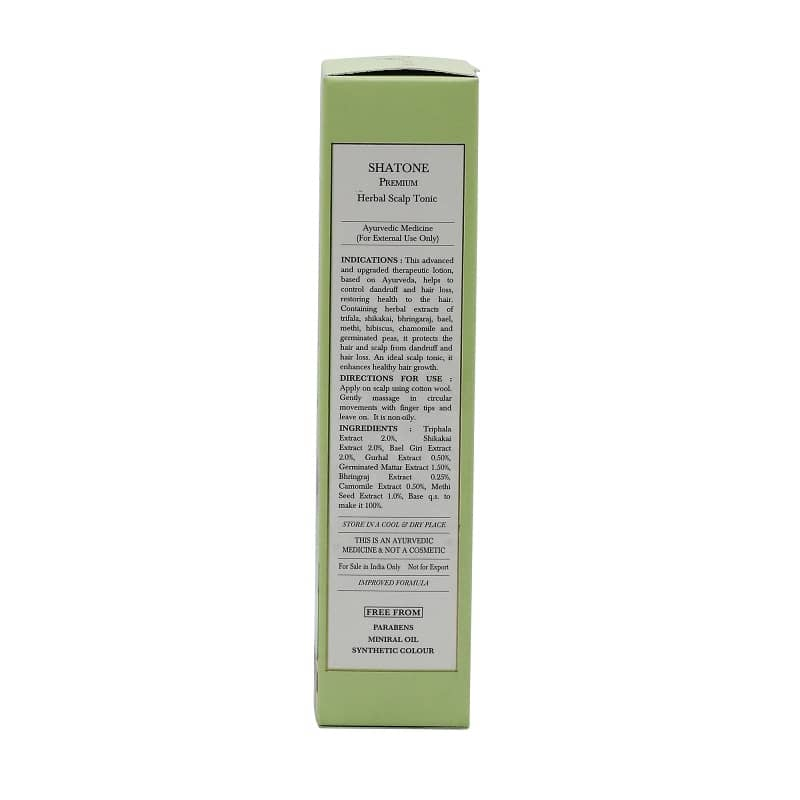

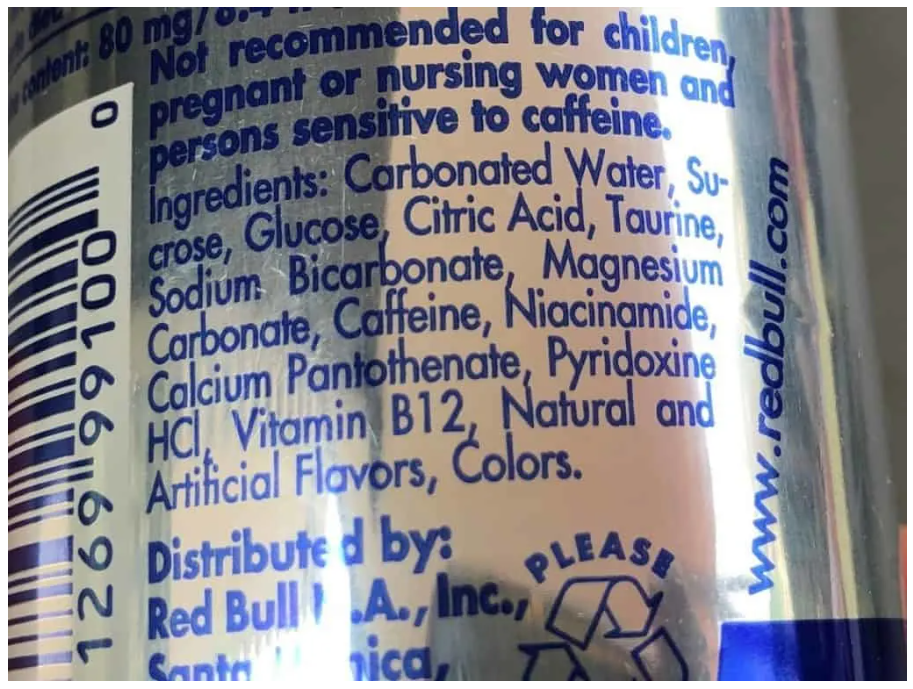

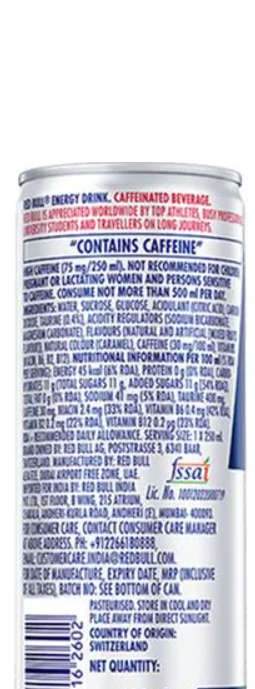

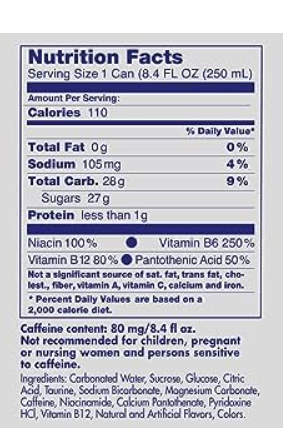

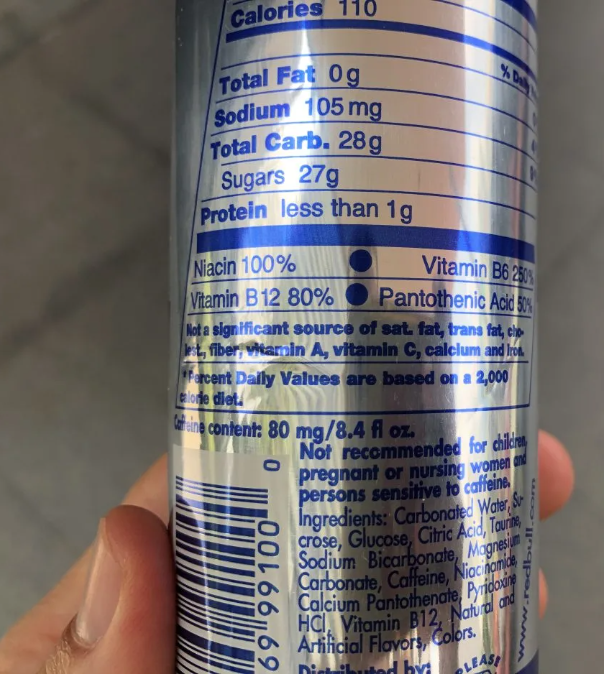

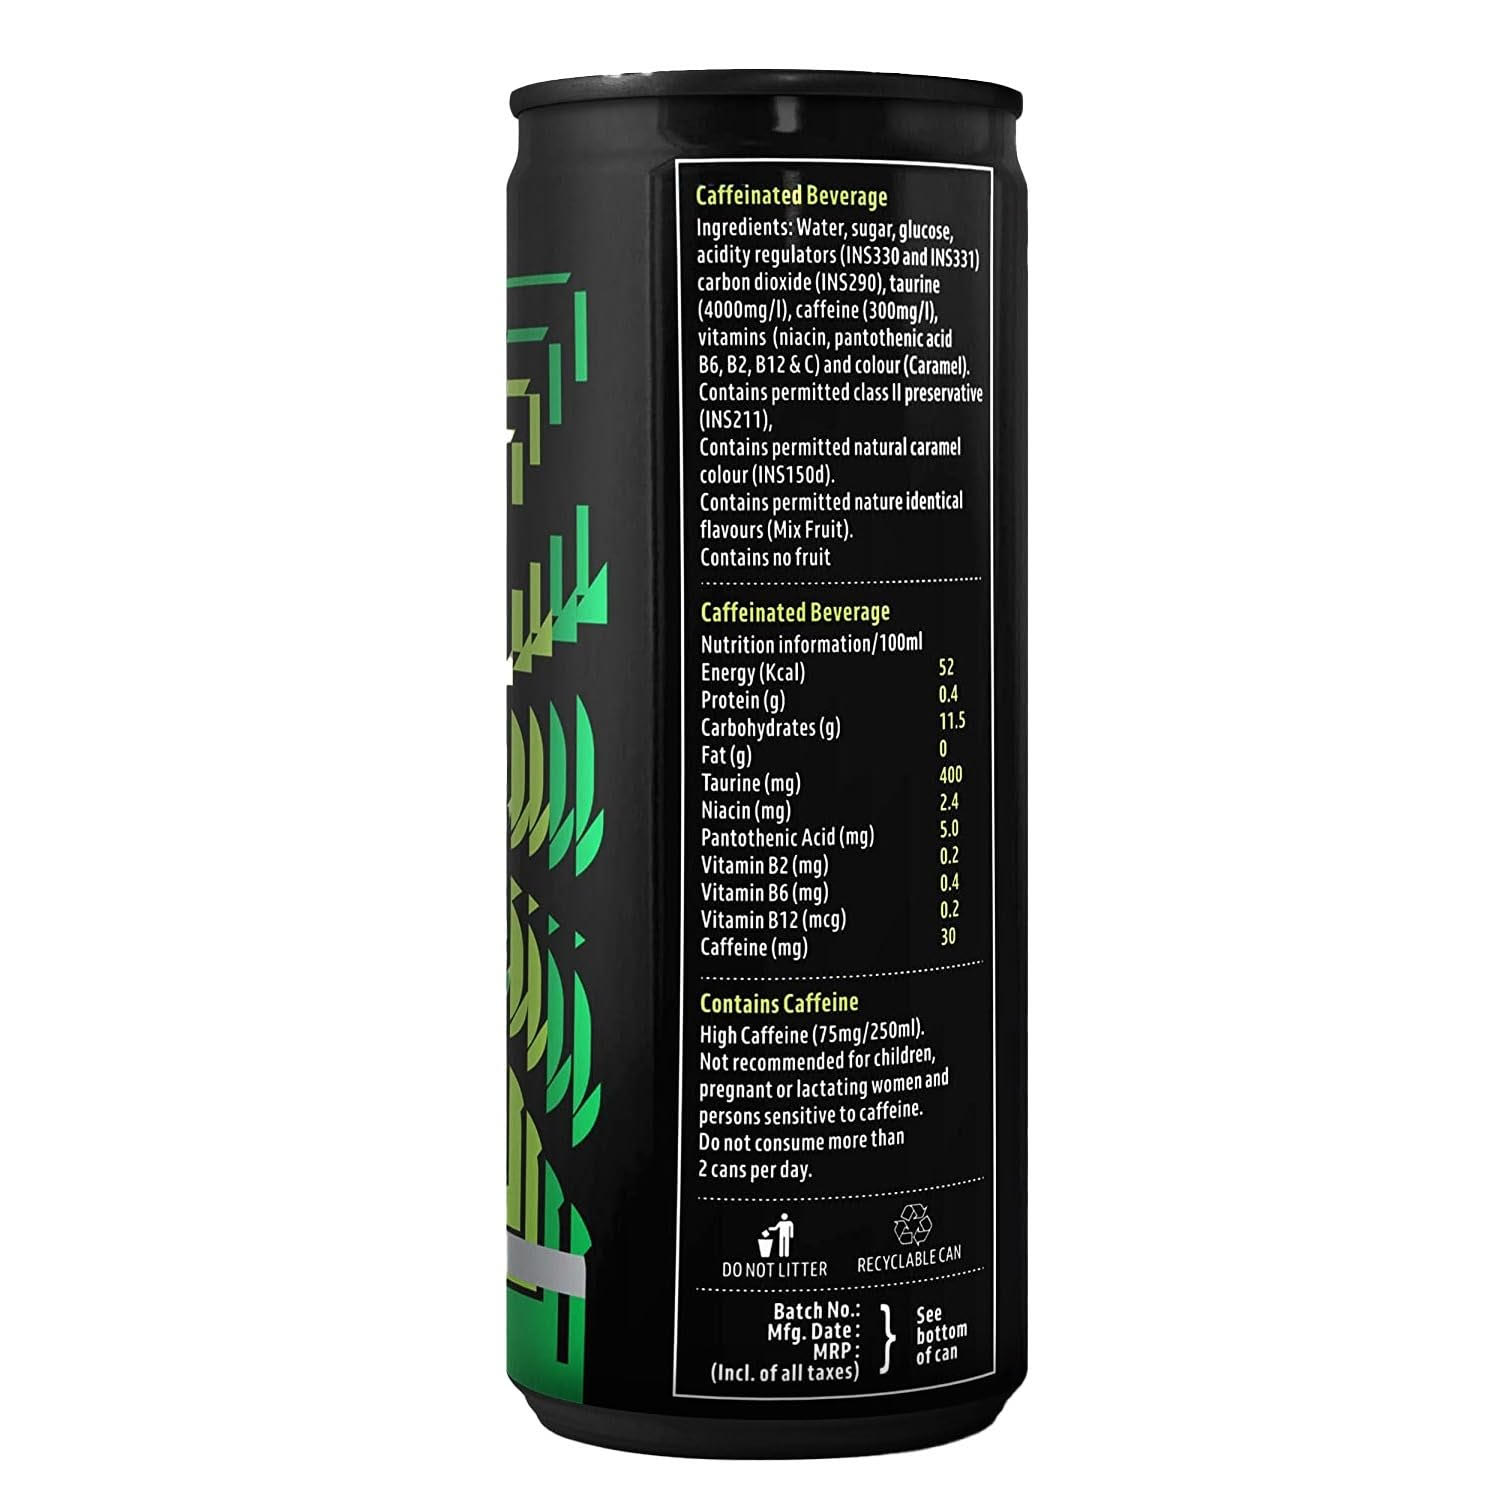

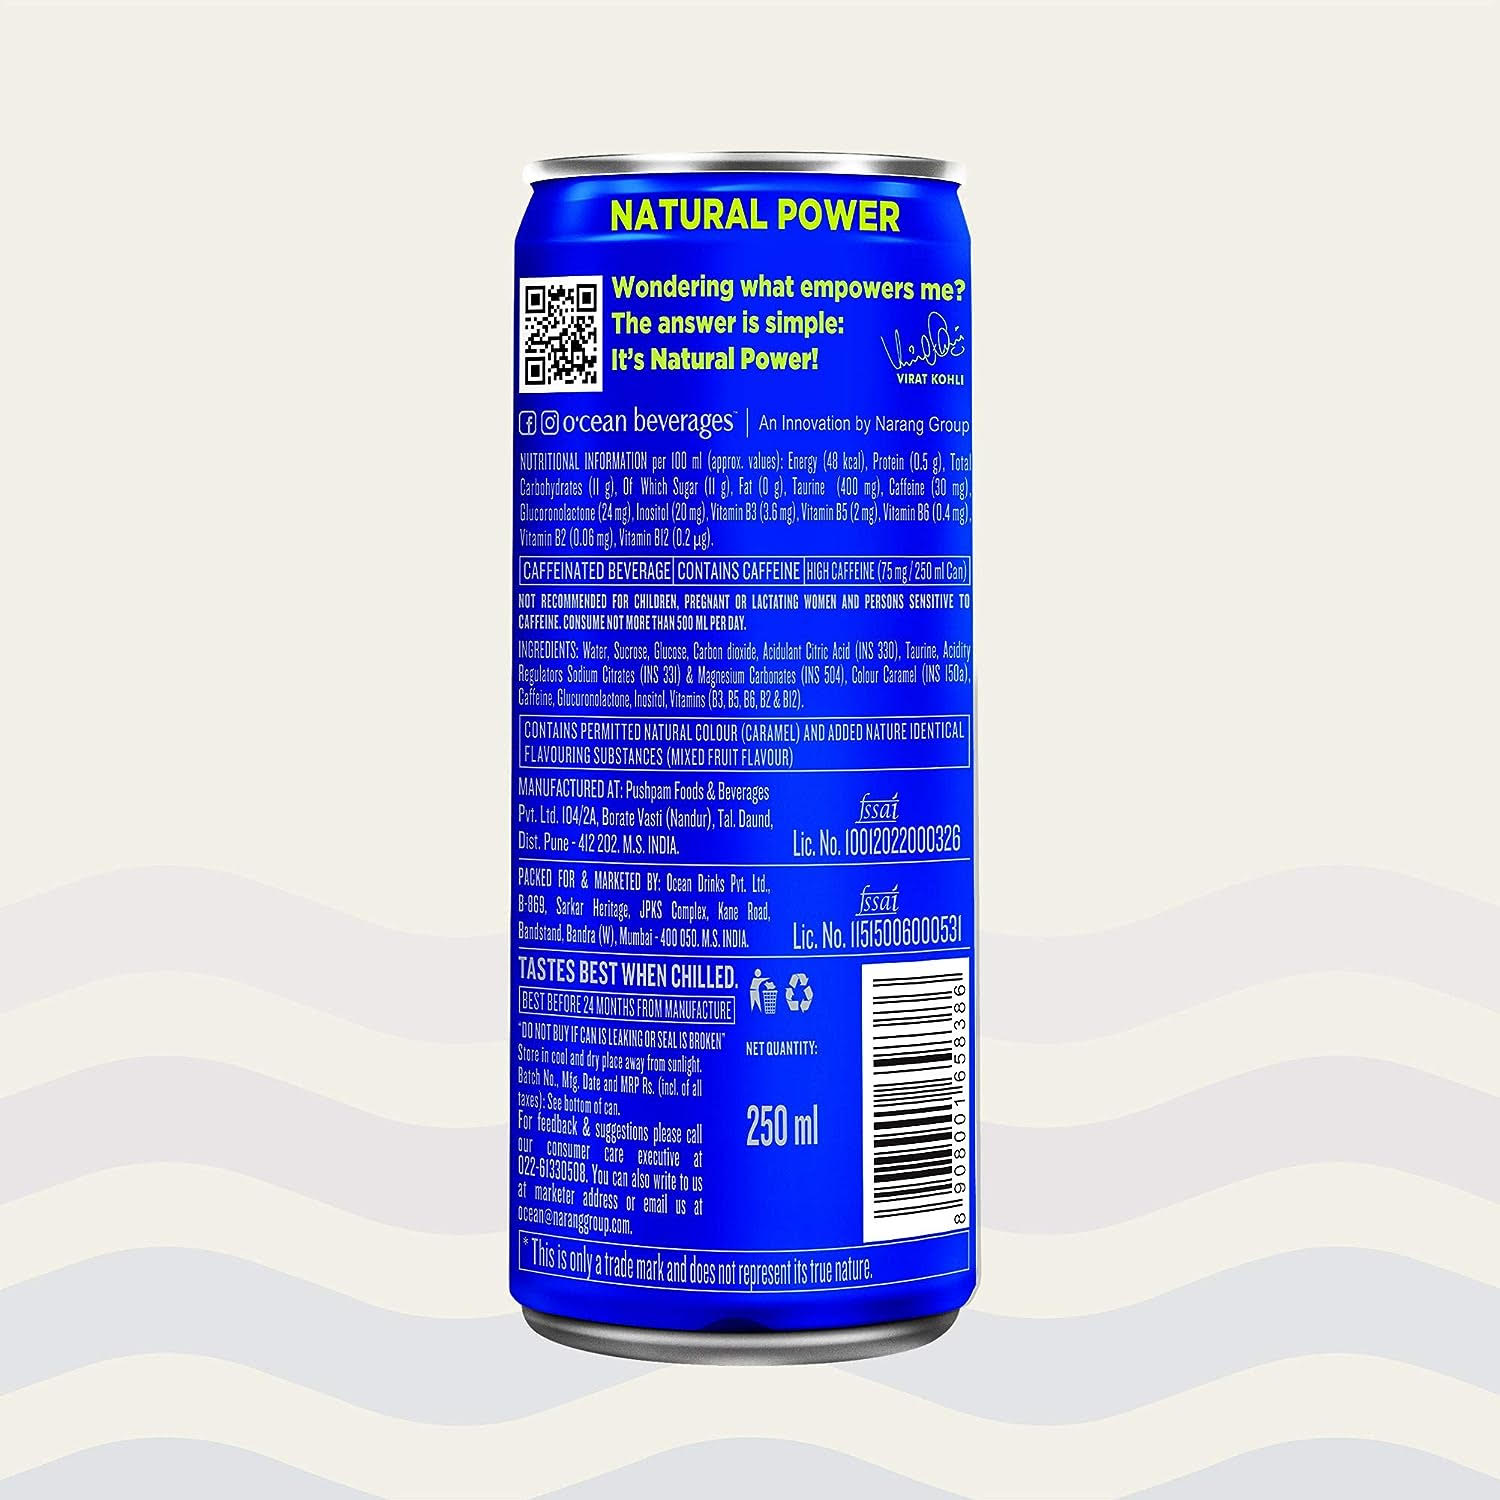

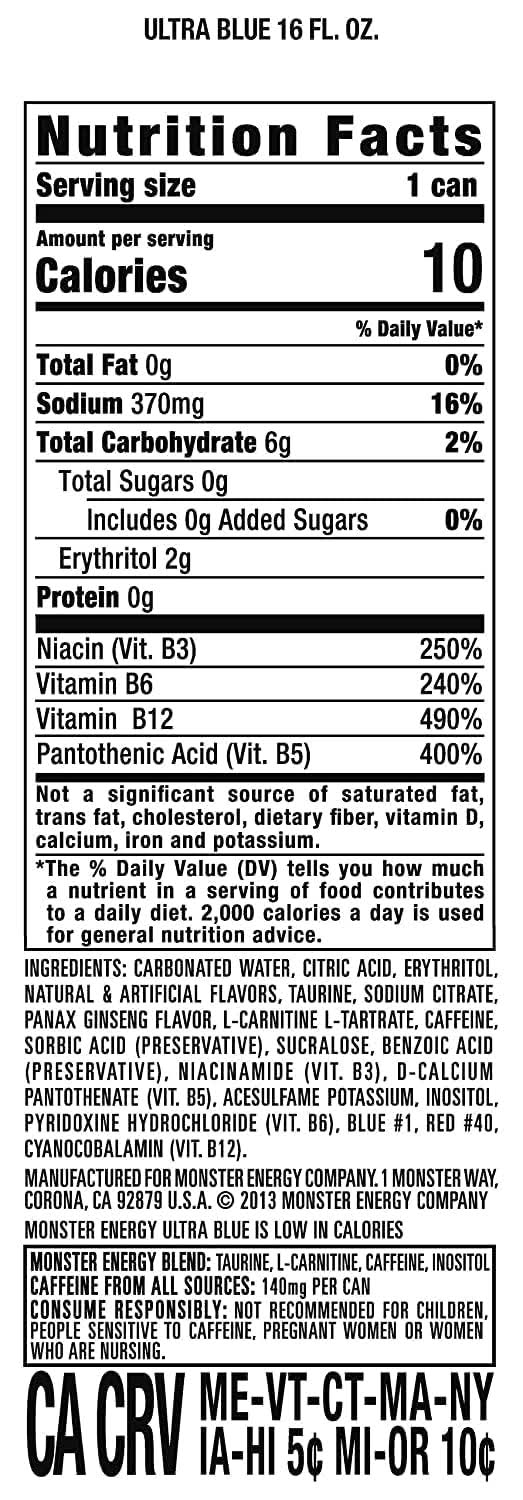

In [5]:
#from google.colab.patches import cv2_imshow

img = Image.open('/content/ocr_repo/shatone.jpg')
display(img)

redbull1 = Image.open('/content/ocr_repo/RedBull1.png')
display(redbull1)

redbull2 = Image.open('/content/ocr_repo/RedBull2.png')
display(redbull2)

redbull3 = Image.open('/content/ocr_repo/RedBull3.png')
display(redbull3)

redbull4 = Image.open('/content/ocr_repo/RedBull4.png')
display(redbull4)

energydrink1 = Image.open('/content/ocr_repo/EnergyDrink1.jpg')
display(energydrink1)

energydrink2 = Image.open('/content/ocr_repo/EnergyDrink2.jpg')
display(energydrink2)

energydrink3 = Image.open('/content/ocr_repo/EnergyDrink3.jpg')
display(energydrink3)



### Preprocessing of images using OpenCV

We will write basic functions for different preprocessing methods
- grayscaling
- thresholding
- dilating
- eroding
- opening
- canny edge detection
- noise removal
- deskwing
- template matching.

Different methods can come in handy with different kinds of images.

## ENERGY DRINK IMAGE 1:

In [17]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [18]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

Blue =  [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [218 218 217 ... 218 255 255]
 [218 217 217 ... 218 255 255]
 [218 217 217 ... 218 255 255]]
Green =  [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [218 218 218 ... 218 255 255]
 [218 218 218 ... 218 255 255]
 [218 218 218 ... 218 255 255]]
Red =  [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [218 218 218 ... 218 255 255]
 [218 218 218 ... 218 255 255]
 [218 218 218 ... 218 255 255]]


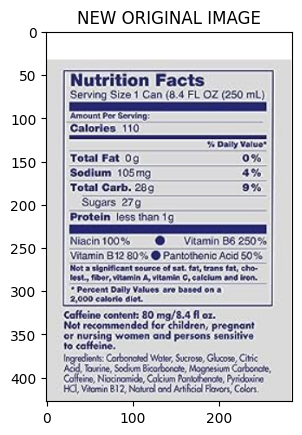

In [19]:
# Plot original image

image = cv2.imread('/content/ocr_repo/RedBull3.png')
b,g,r = cv2.split(image)
print("Blue = ", b)
print("Green = ", g)
print("Red = ", r)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('NEW ORIGINAL IMAGE')
plt.show()

In [20]:
# Preprocess image

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
noise_removal = remove_noise(canny)
deskew

images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

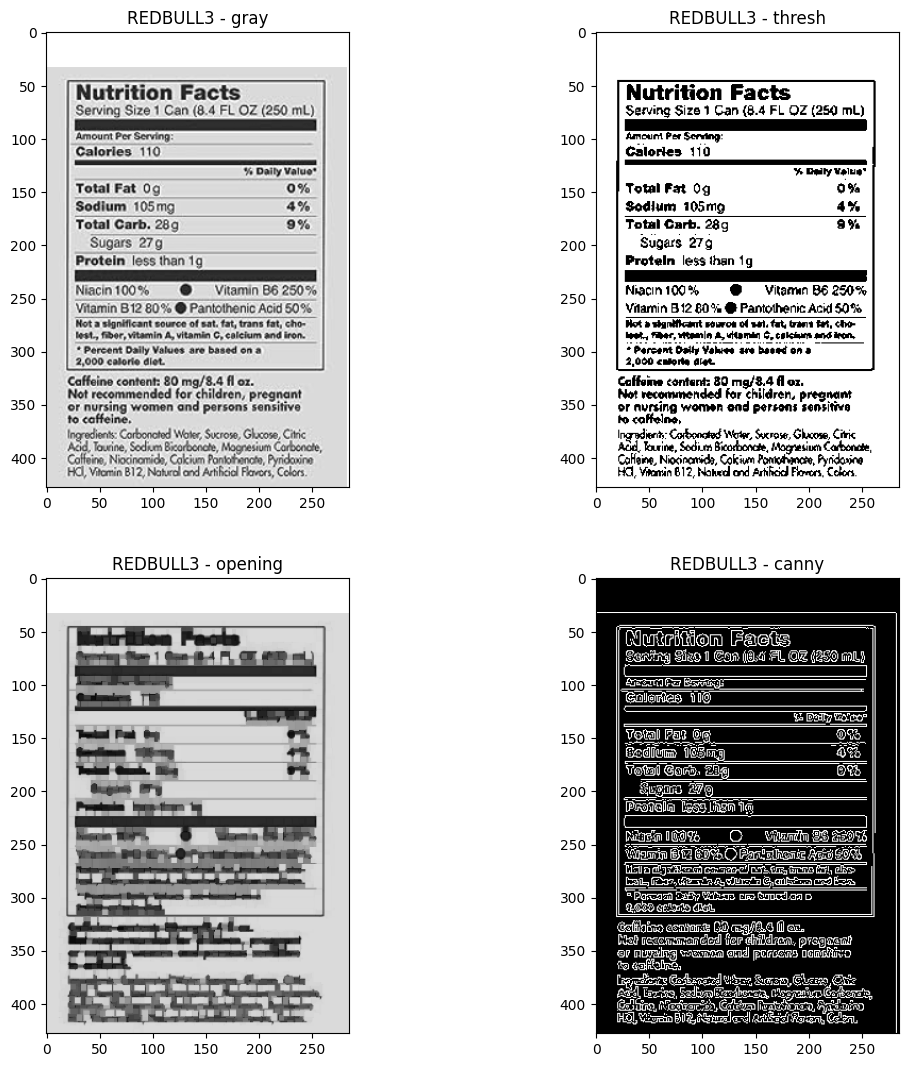

In [22]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('REDBULL3 - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

### Page Segmentation Modes

There are several ways a page of text can be analysed. The tesseract api provides several page segmentation modes if you want to run OCR on only a small region or in different orientations, etc.

Here's a list of the supported page segmentation modes by tesseract -

0    Orientation and script detection (OSD) only.  
1    Automatic page segmentation with OSD.  
2    Automatic page segmentation, but no OSD, or OCR.  
3    Fully automatic page segmentation, but no OSD. (Default)  
4    Assume a single column of text of variable sizes.  
5    Assume a single uniform block of vertically aligned text.  
6    Assume a single uniform block of text.  
7    Treat the image as a single text line.  
8    Treat the image as a single word.  
9    Treat the image as a single word in a circle.  
10    Treat the image as a single character.  
11    Sparse text. Find as much text as possible in no particular order.  
12    Sparse text with OSD.  
13    Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.  

To change your page segmentation mode, change the ```--psm``` argument in your custom config string to any of the above mentioned mode codes.

In [23]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
Nutrition Facts
Serving Size 1 Can (8.4 FL OZ (250 mL)
———aa ey
| Amount Per Serving: =
Calories 110
Daly velvet
Total Fat 0g 0%
Sodium 105mg 4%
Total Carb. 259 9%
Sugars 279
Protein less than 19
77
Niacin 100% @__ Vitamin B6 250%
Vitamin B12 80% @ Pantothenic Acid 50%
‘Wot slanfieant source of et. ft tans ft, cho-
test fer vitamin tami sllum and Wen
* Percent Daly Vales are bated on 8
2,000 clots dat
Caffeine content: £0 mg/8.4 fl oz.
Net recommended for children, pregnant
er nursing women and persons sensitive
to coffeine.
Ingredient: Corboncted Wate, Sucrose, Glcose, Citi
‘Aad, Towne, Sediue Biorbeccte, Magnesium Carbonate,
etiee, Nocearde,Cakiom Pork, Pyrdasrn
HG, Vitomin B12, Naked and Artifciol Flavors, Colors.


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
Nutrition Facts
Serving Siz

## ENERGY DRINK IMAGE 2:

In [6]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [7]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

Blue =  [[232 232 232 ... 232 232 232]
 [232 232 232 ... 232 232 232]
 [232 232 232 ... 232 232 232]
 ...
 [230 230 230 ... 230 230 230]
 [230 230 230 ... 230 230 230]
 [230 230 230 ... 230 230 230]]
Green =  [[239 239 239 ... 239 239 239]
 [239 239 239 ... 239 239 239]
 [239 239 239 ... 239 239 239]
 ...
 [226 226 226 ... 226 226 226]
 [226 226 226 ... 226 226 226]
 [226 226 226 ... 226 226 226]]
Red =  [[242 242 242 ... 242 242 242]
 [242 242 242 ... 242 242 242]
 [242 242 242 ... 242 242 242]
 ...
 [225 225 225 ... 225 225 225]
 [225 225 225 ... 225 225 225]
 [225 225 225 ... 225 225 225]]


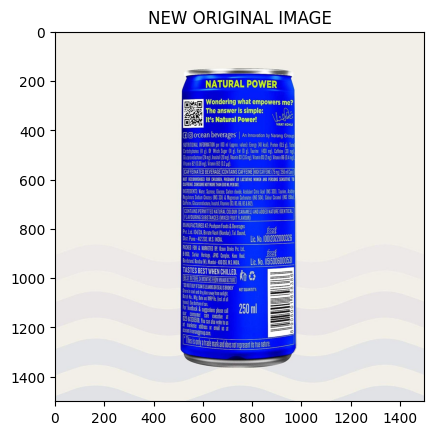

In [9]:
# Plot original image

image = cv2.imread('/content/ocr_repo/EnergyDrink2.jpg')
b,g,r = cv2.split(image)
print("Blue = ", b)
print("Green = ", g)
print("Red = ", r)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('NEW ORIGINAL IMAGE')
plt.show()

In [10]:
# Preprocess image

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
noise_removal = remove_noise(canny)
deskew

images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

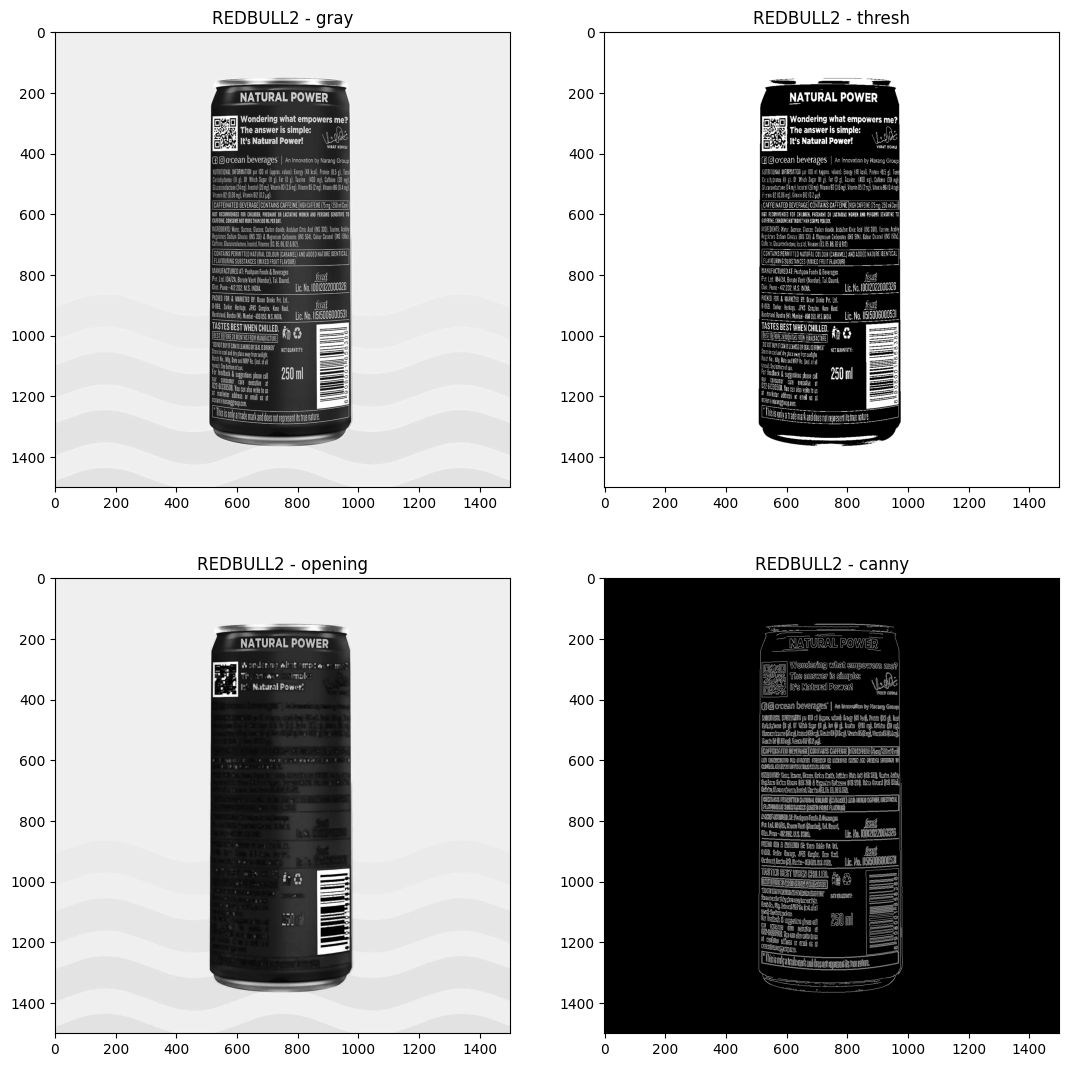

In [11]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('REDBULL2 - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

In [12]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
a
seat] ARTEL STC eS a
apeige BET Ea 11) CH
ae Poy ete re Ne

ia AUT Na Colt)
(@@orcean aVaeaeies | An Innovation by Narang Group)
NUTRITIONAL INFORMATION per 100 ml (approx. values): Energy (49 kel), Protein (0.5 ¢), Total
eT CASO ULC OP TC een)
Glcoranolctone (24mg), Inositol (20 mg), Vitamin B3 (36mg), Vitamin BS (2), Vitamin BS (0.41)
Cen ACTA en OPA
Coat ae VES NSIaYay TCC UNTUSGs ase eGo cada Cea)
Ae CMU UU COUT COLE LTS1
CAFFEINE CONSUMENOT MORETHANSOO MLPEROAY.
UTS ican iecsene ooca evan CHET cn (RAO Ea)
LTATeMN TIMMUTEM NER Rea Lee STUN Ea Manabe (LIK)
Leen OTn EMA NCSTIN eam LAMA) !
ero Ts UP RL ATEL }
FLAVOURING SUBSTANCES (MINED FRUIT FLAVOUR)
gE aS AT: Pushpam Foods & Beverages zt
MUNCIE pial
UA enn ed
CeO caer ae cr y a
AA a
ENEMAS EA ==
CLOTTED ‘ =
cue gE — ]
Nee B=
a a B= |
i rene ier 250 i So
emer eet ——
Ha UIE ns =
BALL CIE ‘i ———,
eons =

Ee ee ]

e

## ENERGY DRINK IMAGE 3:

In [13]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [14]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

Blue =  [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Green =  [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Red =  [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


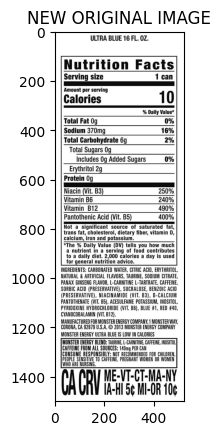

In [15]:

# Plot original image

image = cv2.imread('/content/ocr_repo/EnergyDrink3.jpg')
b,g,r = cv2.split(image)
print("Blue = ", b)
print("Green = ", g)
print("Red = ", r)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('NEW ORIGINAL IMAGE')
plt.show()

In [16]:

# Preprocess image

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
noise_removal = remove_noise(canny)
deskew

images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

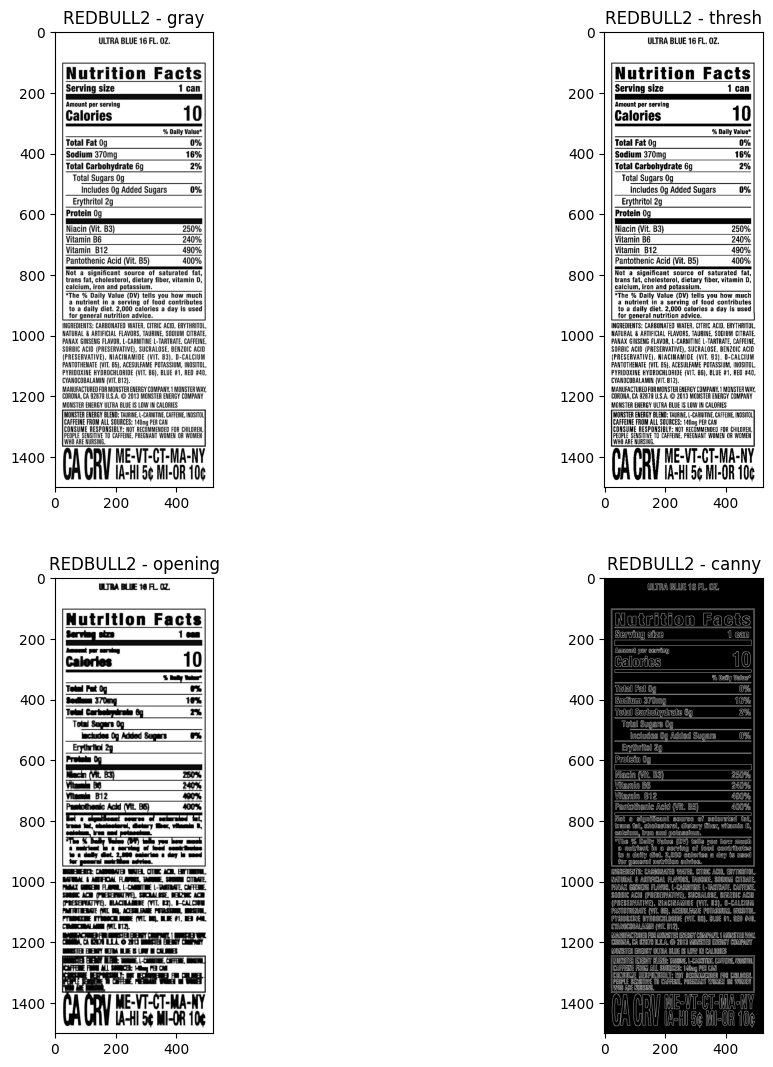

In [17]:

# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('REDBULL2 - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

In [18]:

# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))


-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
ULTRA BLUE 16 FL. 02.
Nutrition Facts
Serving size 1 can
ee
Amount per serving
Calories 10
EL

% Daily Value*

Total Fat 0g 0%

Sodium 370mg 16%

Total Carbohydrate 6g 2%

Total Sugars 0g
Includes 0g Added Sugars 0%
Erythritol 2g

Protein 0g

es

Niacin (Vit. B3) 250%

Vitamin B6 240%

Vitamin B12 490%

Pantothenic Acid (Vit. B5) 400%

——————

Not a significant source of saturated fat,

trans fat, cholesterol, dietary fiber, vitamin D,

calcium, iron and potassium.

*The % Daily Value (DV) tells you how much
a nutrient in a serving of food contributes
to a daily diet. 2,000 calories a day is used
for general nutrition advice.

INGREDIENTS: CARBONATED WATER, CITRIC ACID, ERYTHRITOL,
NATURAL & ARTIFICIAL FLAVORS, TAURINE, SODIUM CITRATE,
PANAX GINSENG FLAVOR, L-CARNITINE L-TARTRATE, CAFFEINE,
SORBIC ACID (PRESERVATIVE), SUCRALOSE, BENZOIC ACID
(PRESERVATIVE), NIACINAMID

<hr>

# PART 2 - Enhancements on EATSAFES.CA

5 Enhancements - OCR based Project :

**Enhancement 1 : Mechanism to alert on high levels of certain substance**<br>
**Enhancement 2 : Customize the alert level based on customers health profile**<br>
**Enhancement 3 : Suggest alternate substitutes/products:**<br>
**Enhancement 4 : Read expiry date and give proper suggestion:**<br>
**Enhancement 5 : Food Safety Resources:**<br>

DATA VISUALIZATION:

Based on user requirements , 5 types of Plots be added, we need to identify the appropriate X and Y co-ordinates.

**Enhancement 1 : Mechanism to alert on high levels of certain substance**

*Description : This would be a mechanism , where after converting the label of the ingredients to OCR the mechanism/algorithm should be able to detect high levels of fats , concentrated sugar , salt levels etc , what we can do is train the model/feed in a data set of ingredients which are harmful to the human body , so as and when the algorithm detects the high levels of these substances it will immediately warn the user and display a graph or chart showing the overall ingredients but will emphasize on the harmful ingredients (fats, concentrated sugars etc depending on the data set we feed it) and show them with bold indices so that the user is aware of the substances they are consuming.*






**Details:** Enhancement 1 introduces a pivotal mechanism to amplify consumer awareness and promote healthier dietary choices: a cutting-edge system designed to alert users about elevated levels of specific substances in food products. This revolutionary approach harnesses the power of Optical Character Recognition (OCR) technology to decipher ingredient labels, enabling the algorithm to swiftly identify excessive quantities of substances such as fats and concentrated sugars.

The mechanism's foundation lies in an intricately trained model fed with a comprehensive dataset of ingredients recognized as potentially detrimental to human health. As the algorithm detects surges in these substances, it promptly issues alerts to users, effectively serving as a real-time safeguard against potentially harmful consumption. Beyond alerts, the system augments user comprehension by visually representing ingredient proportions through interactive graphs or charts. This visualization focuses attention on the harmful constituents, like fats and sugars, rendering them in bold indices for clear distinction.

By seamlessly integrating technology with nutritional awareness, this enhancement empowers consumers to make more informed food choices. The mechanism serves as an educational tool, aligning with modern dietary preferences while addressing health concerns. In essence, it is a stride towards fostering an environment where individuals can proactively curate their diets, ultimately contributing to their overall well-being.

**THRESHOLD ALERT :**  Once a particular quantity exceeds a certain level, the user should be intimated.

The Threshold Limit for ENERGY DRINKS & PROTEIN SUPPLEMENTS is categorized in tbe below Excel Sheet:
LINK: https://docs.google.com/spreadsheets/d/1ePaJ1AVIf7uSH5CmVbcKR7gT4venxIwPyTecFLHVu_k/edit#gid=0

In [68]:
import csv

# Load dataset for ingredients and limits
dataset_path = "/content/ocr_repo/Energy Drinks.csv"
ingredient_list_diabetic = []
harmful_substances_limits_diabetic = {}

with open(dataset_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        ingredient = {
            "name": row["Ingredients List"],
            "quantity": row["Levels of Each Ingredient"],
            "unit": "g" if row["Levels of Each Ingredient"].isdigit() else row["Levels of Each Ingredient"].split()[1],
        }
        ingredient_list_diabetic.append(ingredient)

        limit = row["Thresholds for Diabetes Mellitus (per serving)"]
        harmful_substances_limits_diabetic[row["Ingredients List"]] = limit

# Initialize an alert flag
trigger_alert_diabetic = False

# Compare ingredients with safe limits for diabetics
for ingredient in ingredient_list_diabetic:
    if ingredient["name"] in harmful_substances_limits_diabetic:
        if ingredient["quantity"] > harmful_substances_limits_diabetic[ingredient["name"]]:
            print(f"Alert: {ingredient['name']} exceeds safe limit for diabetics! Quantity: {ingredient['quantity']}{ingredient['unit']}")
            trigger_alert_diabetic = True

# If any substance exceeded its safe limit, trigger an alert
if trigger_alert_diabetic:
    print("**************************************************")
    print("Triggering an alert for Diabetic Mellitus concerns!")
    print("**************************************************")
else:
    print("No harmful substances exceeded safe limits for Diabetics Mellitus.")


Alert: Water, Sucrose, Glucose, Citric Acid, Taurine, Sodium Bicarbonate, Magnesium Carbonate, Caffeine, Niacinamide, Pantothenic Acid, Pyridoxine HCl, Vitamin B12, Natural and Artificial Flavors exceeds safe limit for diabetics! Quantity: Sugar: 27g, Caffeine: 80mg, Taurine: 1000mg27g,
Alert: Carbonated Water, Sucrose, Glucose, Citric Acid, Natural Flavors, Taurine, Sodium Citrate, Panax Ginseng Extract, L-Carnitine, Caffeine, Sorbic Acid, Benzoic Acid, Niacinamide, Sucralose exceeds safe limit for diabetics! Quantity: Sugar: 27g, Caffeine: 160mg, Taurine: 1000mg27g,
Alert: Carbonated Water, High Fructose Corn Syrup, Caffeine, Taurine, Guarana Seed Extract, Carnitine, Ginseng Root Extract, Milk Thistle Extract, Natural Flavors, Caramel Color exceeds safe limit for diabetics! Quantity: Sugar: 30g, Caffeine: 160mg, Taurine: 1000mg30g,
Alert: Purified Water, Natural and Artificial Flavors, Sucralose, Potassium Sorbate, Sodium Benzoate, EDTA, Niacinamide, D-Calcium Pantothenate, Pyridoxin

**Enhancement 2 : Customize the alert level based on customers health profile**:

*Description : Provide option to input customers health profile like BMS, pre-existing conditions like diabetes, blood pressure, allergies so that out app will tune the alert levels accordingly.*



**Details :** Enhancement 2 seeks to introduce a groundbreaking feature aimed at elevating user experience and health outcomes: the ability to customize alert levels based on individual customer health profiles. This innovation recognizes the diverse health needs of consumers, offering a holistic approach to food consumption safety.
The proposed mechanism entails an intuitive interface where users can input their health profiles, encompassing vital indicators such as Body Mass Index (BMI), and pre-existing medical conditions such as diabetes, blood pressure, and allergies. Leveraging this information, the application will dynamically adjust alert thresholds to align with each user's specific health requirements.
By tailoring alerts to personal health attributes, the app empowers individuals to make informed dietary choices that align with their unique circumstances. For instance, an individual with diabetes may receive heightened alerts concerning sugar content, while someone with allergies could receive notifications about potential allergens.
This innovative feature not only enhances user engagement and awareness but also fosters a proactive approach to health-conscious eating. By merging the power of technology with personalized health data, the system provides an invaluable tool for maintaining well-being. Ultimately, this advancement underscores our commitment to advancing food safety in a manner that is both inclusive and impactful, ushering in a new era of food safety where individual health profiles are at the forefront of decision-making.

In [80]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("/content/ocr_repo/Energy Drinks.csv")

# Ask the user for input (Energy Drink)
print("*********************************************************")
energy_drink_to_find = input("Enter the name of the Energy Drink: ")
print("*********************************************************")

# Type of threshold ("Diabetes Mellitus" or "Cardiovascular")
threshold_type= input("Choose the Option ( 1/ 2) 1.Diabetes Mellitus or 2.Cardiovascular")
threshold_type1 = "Diabetes Mellitus"
threshold_type2 = "Cardiovascular"

print("Retrieving from Dataset...")
# Filter the DataFrame based on the user's input for Energy Drink
filtered_df = df[df["Energy Drink"] == energy_drink_to_find]

# Check if the filtered DataFrame is empty (no matching records found)
if filtered_df.empty:
    print(f"No matching records found for '{energy_drink_to_find}'.")
else:
    # Determine the appropriate threshold column based on user input
    threshold_column = "Thresholds for Diabetes Mellitus (per serving)" if threshold_type== "1" else "Thresholds for Cardiovascular Diseases"

    # Access the threshold value for the first matching row
    threshold_value = filtered_df[threshold_column].values[0]

    # Display the message with the threshold value
    print("*********************************************************")
    print(f"You shouldn't consume more than these limits \n {threshold_value} \n of the substance for *** {energy_drink_to_find} ***.")
    print("*********************************************************")


*********************************************************
Enter the name of the Energy Drink: Red Bull Energy Drink
*********************************************************
Choose the Option ( 1/ 2) 1.Diabetes Mellitus or 2.Cardiovascular1
Retrieving from Dataset...
*********************************************************
You shouldn't consume more than these limits 
 Sugar: 10g, 
Caffeine: 40mg 
 of the substance for *** Red Bull Energy Drink ***.
*********************************************************


**Enhancement 3 : Suggest alternate substitutes/products:**

*Description : Alternate substitutes/products that are within the safety limits for that customer. This will be based on other people scans.*



**Details :** Enhancement 3 introduces a dynamic solution aimed at revolutionizing consumer decision-making and product choices: the integration of an ingenious feature that suggests alternate substitutes or products, all within safe limits tailored to each individual customer. This forward-looking approach leverages collective insights from the scans of other users to provide personalized recommendations.

This innovative mechanism serves as a guiding compass for customers seeking to replace certain ingredients or products with healthier options. Drawing from a wealth of data, the system analyzes scans performed by a diverse range of users, identifying ingredients or products that fall within established safety parameters. For instance, if a customer seeks to swap a high-sugar item, the system taps into its repository of user scans to propose items that align with their dietary preferences while adhering to safety guidelines.

These personalized suggestions not only empower users to make healthier choices but also foster a sense of community among individuals with similar health-conscious goals. By curating a repository of safe alternatives gleaned from collective experiences, the enhancement empowers users to navigate the intricacies of ingredient labels with confidence.

In essence, this innovation bridges the gap between information and action, transforming the way people make dietary decisions. By embracing technology as an ally in the pursuit of healthier lifestyles, this enhancement underscores our commitment to enhancing food safety and promoting well-being in a manner that resonates with each unique consumer journey.

In [74]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("/content/ocr_repo/Energy Drinks.csv")

# Ask the user for input (Energy Drink)
print("******************************************************************************************")
energy_drink_to_find = input("Enter the name of the Energy Drink you want to find Alternative Ingredients : ")
print("******************************************************************************************")

# Filter the DataFrame based on the user's input for Energy Drink
filtered_df = df[df["Energy Drink"] == energy_drink_to_find]

# Check if the filtered DataFrame is empty (no matching records found)
if filtered_df.empty:
    print(f"No matching records found for '{energy_drink_to_find}'.")
else:
    # Access the value in the Alternative Ingredient List for the first matching row
    alternative_ingredient_list = filtered_df["Alternative Ingredient List"].values[0]

    # Display the Alternative Ingredient List
    print("Alternative Ingredient List for *** ", energy_drink_to_find, " *** :", alternative_ingredient_list)


******************************************************************************************
Enter the name of the Energy Drink you want to find Alternative Ingredients : Rockstar Energy Drink
******************************************************************************************
Alternative Ingredient List for ***  Rockstar Energy Drink  *** : Coconut Sugar, L-Theanine


**Enhancement 4 : Read expiry date and give proper suggestion:**

**Details:** Enhancement 4 introduces a pivotal advancement that redefines consumer safety and confidence: a sophisticated feature designed to read and interpret expiry dates, offering users informed suggestions for appropriate actions. This cutting-edge mechanism harnesses technological innovation to empower users in making more informed consumption decisions.

At its core, this enhancement employs advanced image recognition and machine learning algorithms to accurately read and decipher expiry dates on food products. Once the date is processed, the system provides tailored recommendations based on the proximity to the stated expiration date. For instance, if a product is nearing its expiry, the system could suggest immediate consumption or proper disposal.

This proactive approach not only mitigates the risk of ingesting expired products but also minimizes food wastage, contributing to both consumer well-being and sustainability efforts. The technology extends beyond mere detection, as it educates users about the significance of expiry dates and the implications of consuming expired goods.

By intertwining technology with practical application, this enhancement underscores our commitment to revolutionizing food safety. It places information and empowerment directly in the hands of consumers, ensuring they make choices that align with their health and ethical values. Ultimately, this feature exemplifies the potential of innovation in fostering a safer and more conscientious food consumption culture.

## SCENARIO 1 : Product hasn't expired

In [81]:
import pandas as pd
import datetime

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("/content/ocr_repo/Energy Drinks.csv")

# Ask the user for input (Energy Drink)
energy_drink_to_find = input("Enter the name of the Energy Drink: ")

# Filter the DataFrame based on the user's input for Energy Drink
filtered_df = df[df["Energy Drink"] == energy_drink_to_find]

# Check if the filtered DataFrame is empty (no matching records found)
if filtered_df.empty:
    print(f"No matching records found for '{energy_drink_to_find}'.")
else:
    # Access the expiry date value for the first matching row
    expiry_date_str = filtered_df["Expiry Dates"].values[0]
    print(f"The EXPIRY DATE for the Energy Drink chosen is '{expiry_date_str}'.")

    # Convert the expiry date string to a datetime object
    expiry_date = datetime.datetime.strptime(expiry_date_str, "%d-%m-%Y")

    # Get the current system date
    current_date = datetime.datetime.now()

    # Compare the expiry date with the current date
    if expiry_date < current_date:
        print(f"Do Not Use for Critical Conditions: +++ Expired Energy Drink +++  should never be used to treat serious or life-threatening conditions. Seek immediate medical attention in such cases. Expiry Date: {expiry_date.strftime('%d-%m-%Y')}")
    else:
        print(f"The medication is still within its expiry date: {expiry_date.strftime('%d-%m-%Y')}")


Enter the name of the Energy Drink: Red Bull Energy Drink
The EXPIRY DATE for the Energy Drink chosen is '07-09-2023'.
The medication is still within its expiry date: 07-09-2023


## SCENARIO 2 : Product has expired

In [92]:
import pandas as pd
import datetime

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("/content/ocr_repo/Energy Drinks.csv")

# Ask the user for input (Energy Drink)
energy_drink_to_find = input("Enter the name of the Energy Drink: ")

# Filter the DataFrame based on the user's input for Energy Drink
filtered_df = df[df["Energy Drink"] == energy_drink_to_find]

# Check if the filtered DataFrame is empty (no matching records found)
if filtered_df.empty:
    print(f"No matching records found for '{energy_drink_to_find}'.")
else:
    # Access the expiry date value for the first matching row
    expiry_date_str = filtered_df["Expiry Dates"].values[0]
    print(f"The EXPIRY DATE for the Energy Drink chosen is '{expiry_date_str}'.")

    # Convert the expiry date string to a datetime object
    expiry_date = datetime.datetime.strptime(expiry_date_str, "%d-%m-%Y")


    # Get the current date and time
    current_date = datetime.datetime.now()

    # Add 15 days to the current date
    new_date = current_date + datetime.timedelta(days=15)

    # Print the new date
    # Convert the expiry date string to a datetime object
    current_date = new_date.strftime('%d-%m-%Y')


    print("New Date after adding 15 days:", current_date)




    # Compare the expiry date with the current date
    if expiry_date < new_date:
        print(f"Do Not Use for Critical Conditions: +++ {energy_drink_to_find} +++  should never be used to treat serious or life-threatening conditions. Seek immediate medical attention in such cases. Expiry Date: {expiry_date.strftime('%d-%m-%Y')}")
    else:
        print(f"The medication is still within its expiry date: {expiry_date.strftime('%d-%m-%Y')}")

Enter the name of the Energy Drink: Monster Energy
The EXPIRY DATE for the Energy Drink chosen is '08-09-2023'.
New Date after adding 15 days: 16-09-2023
Do Not Use for Critical Conditions: +++ Monster Energy +++  should never be used to treat serious or life-threatening conditions. Seek immediate medical attention in such cases. Expiry Date: 08-09-2023


**Enhancement 5 : Food Safety Resources:**

*Description : Compile and provide a comprehensive collection of resources, including guidelines, research papers, reports, and best practice documents related to food safety. Users can access these resources for reference and further study.*



**Details:** Enhancement 5 introduces an invaluable resource that empowers users with knowledge and insights crucial to their well-being: a meticulously curated compilation of Food Safety Resources. This innovative feature serves as a repository of guidelines, research papers, reports, and best practice documents meticulously selected to foster informed decision-making and heightened awareness.

Designed to be user-centric, this enhancement grants users unrestricted access to a wealth of information directly relevant to food safety. By offering a centralized hub of diverse resources, ranging from authoritative guidelines to pioneering research, individuals are empowered to delve deeper into the intricacies of safe food consumption.

The interface seamlessly connects users with a treasure trove of educational materials, each meticulously chosen to cater to different levels of comprehension and interest. From those seeking fundamental guidelines to experts pursuing advanced studies, the collection covers the spectrum of food safety insights.

This comprehensive resource not only bolsters user knowledge but also cultivates a culture of informed consumption and safety consciousness. By placing a vast array of resources at users' fingertips, this enhancement elevates their understanding and appreciation of the nuances of food safety, ultimately contributing to their overall well-being. As a testament to our commitment to user-centric innovation, this feature is poised to become an indispensable tool in fostering a safer and more educated approach to food choices.

In [61]:
import csv

# Load dataset for food safety resources
dataset_path = "/content/ocr_repo/Energy Drinks.csv"
food_safety_resources = {}

with open(dataset_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row["S.No"] == "Food Safety Resources":
            resource_name = row["Energy Drink"]
            resource_url = row["Alternative Ingredient List"]
            food_safety_resources[resource_name] = resource_url

# Function to display food safety resources
def display_food_safety_resources(food_safety_resources):
    print("Food Safety Resources:")
    for resource, url in food_safety_resources.items():
        print(f"{resource}: {url}")

# Display food safety resources
display_food_safety_resources(food_safety_resources)


Food Safety Resources:


<hr><hr>